#PyTorch object detection with pre-trained networks

PyTorch to perform object detection using the following state-of-the-art classification networks:

##Image detection Networks
* Faster R-CNN with a ResNet50 backbone
* Faster R-CNN with a MobileNet v3 backbone
* RetinaNet with a ResNet50 backbone

In [1]:
!pip install torch torchvision
!pip install opencv-contrib-python

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   - -------------------------------------- 1.8/46.2 MB 9.1 MB/s eta 0:00:05
   --- ------------------------------------ 4.2/46.2 MB 10.5 MB/s eta 0:00:05
   ----- ---------------------------------- 6.8/46.2 MB 11.3 MB/s eta 0:00:04
   -------- ------------------------------- 9.4/46.2 MB 12.0 MB/s eta 0:00:04
   ---------- ----------------------------- 12.3/46.2 MB 12.1 MB/s eta 0:00:03
   ------------- -------------------------- 15.2/46.2 MB 12.4 MB/s eta 0:00:03
   --------------- ------------------------ 18.4/46.2 MB 12.6 MB/s eta 0:00:03
   ------------------ --------------------- 21.0/46.2 MB 12.7 MB/s eta 0:00:02
   -------------------- ------------------- 23.9/46.2 MB 12.8 MB/s eta 0:00:02
   ----------------------- ---------------- 26.7/46.2 MB 12.8 MB/s eta 0:00:02
   ------------------------- -------------- 29.4/46.2 MB 12.8 MB/s eta 0:00:02
   --------------------------- ------------ 32.0/46.2 MB 12.8 MB/s

In [2]:
from torchvision.models import detection
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import pickle
import torch
import cv2

In [5]:
model_choice = ["frcnn-resnet", "frcnn-mobilenet", "retinanet"]
confidence_score   = 0.5
# set the device we will be using to run the model
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load the list of categories in the COCO dataset and then generate a
# set of bounding box colors for each class
CLASSES = pickle.loads(open("utils/coco_classes.pickle", "rb").read())
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [6]:
# initialize a dictionary containing model name and its corresponding
# torchvision function call
MODELS = {
	"frcnn-resnet": detection.fasterrcnn_resnet50_fpn,
	"frcnn-mobilenet": detection.fasterrcnn_mobilenet_v3_large_320_fpn,
	"retinanet": detection.retinanet_resnet50_fpn
}
# load the model and set it to evaluation mode
model = MODELS[model_choice[0]](pretrained=True, progress=True,
	num_classes=len(CLASSES), pretrained_backbone=True).to(DEVICE)
model.eval()

c:\Users\gsubramani\Documents\Codebase\Pytorch-NeuralNetwork\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\gsubramani\Documents\Codebase\Pytorch-NeuralNetwork\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\gsubramani\Documents\Codebase\Pytorch-NeuralNetwork\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instea

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

##PyTorch provides us with three object detection models:

* Faster R-CNN with a ResNet50 backbone (more accurate, but slower)
* Faster R-CNN with a MobileNet v3 backbone (faster, but less accurate)
* RetinaNet with a ResNet50 backbone (good balance between speed and accuracy)

### Preparing our input images for object deteciton:

In [8]:
# load the image from disk
image = cv2.imread("utils/F9.jpg")
orig = image.copy()
# convert the image from BGR to RGB channel ordering and change the
# image from channels last to channels first ordering
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.transpose((2, 0, 1))
# add the batch dimension, scale the raw pixel intensities to the
# range [0, 1], and convert the image to a floating point tensor
image = np.expand_dims(image, axis=0)
image = image / 255.0
image = torch.FloatTensor(image)
# send the input to the device and pass the it through the network to
# get the detections and predictions
image = image.to(DEVICE)
detections = model(image)[0]

[INFO] car: 99.72%
[INFO] person: 99.57%
[INFO] person: 99.43%
[INFO] person: 98.05%
[INFO] person: 96.79%
[INFO] person: 96.46%
[INFO] person: 95.99%
[INFO] car: 93.42%
[INFO] person: 92.96%
[INFO] person: 89.27%
[INFO] car: 82.97%
[INFO] person: 80.75%
[INFO] car: 76.48%
[INFO] motorcycle: 72.23%
[INFO] person: 62.21%
[INFO] baseball glove: 55.44%


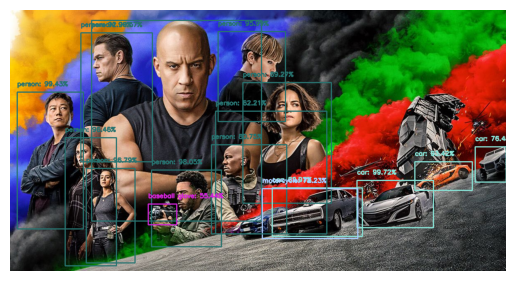

In [9]:
# loop over the detections
for i in range(0, len(detections["boxes"])):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections["scores"][i]
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > confidence_score:
		# extract the index of the class label from the detections,
		# then compute the (x, y)-coordinates of the bounding box
		# for the object
		idx = int(detections["labels"][i])
		box = detections["boxes"][i].detach().cpu().numpy()
		(startX, startY, endX, endY) = box.astype("int")
		# display the prediction to our terminal
		label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
		print("[INFO] {}".format(label))
		# draw the bounding box and label on the image
		cv2.rectangle(orig, (startX, startY), (endX, endY),
			COLORS[idx], 2)
		y = startY - 15 if startY - 15 > 15 else startY + 15
		cv2.putText(orig, label, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
# show the output image
# cv2.imshow("Output", orig)
# cv2.waitKey(0)
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()